# PRISMO on Mouse Brain SlideSeqV2 Data from NSF paper

In [35]:
%load_ext autoreload
%autoreload 2

import sys
import os
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)

import plotting_settings
import seaborn as sns
from functools import partial
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from prismo import PRISMO
from prismo.pl import weights
from plotnine import *
from data_loader import load_nsf_slideseq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
data = load_nsf_slideseq()

In [26]:
os.getcwd()

'/data/florin/prismo_project/prismo-analysis/comparison_nsf'

In [23]:
model = PRISMO.load("models/prismo_6_hs")

In [15]:
factors = model.get_factors()["group_1"]
covariates = pd.DataFrame(model.covariates["group_1"], columns=["x", "y"], index=factors.index)

df = pd.concat([factors, covariates], axis=1)
df_long = pd.melt(df, id_vars=["x", "y"], var_name="Factor", value_name="Score")

df_long["Factor"] = pd.Categorical(df_long["Factor"], categories=df_long["Factor"].unique(), ordered=True)

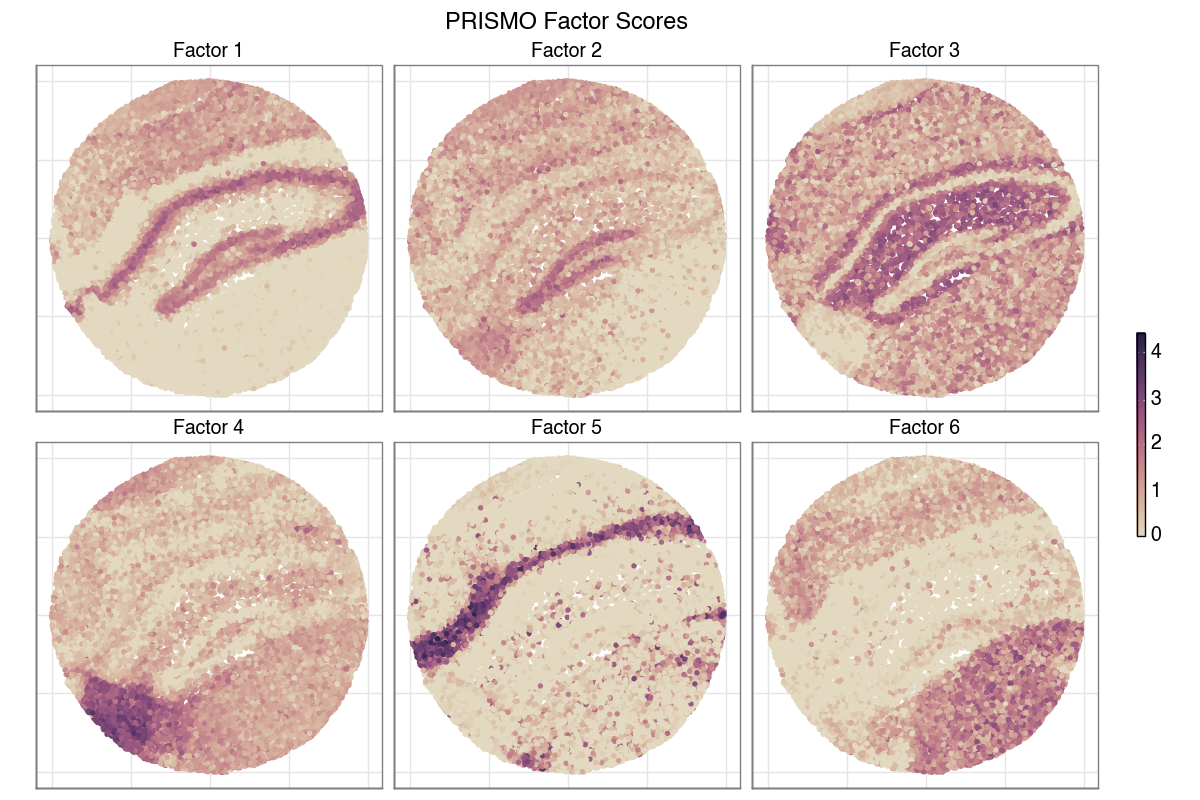

In [34]:
plot = (
    ggplot(df_long, aes(x="x", y="-y", color="Score"))
    + geom_point(size=0.1, raster=True)
    + theme(
        figure_size=(6, 4),
        axis_text_x=element_blank(),
        axis_text_y=element_blank(),
        axis_ticks_major_x=element_blank(),
        axis_ticks_major_y=element_blank(),
        legend_key_width=3.,
    )
    + labs(x="", y="", color="", title="PRISMO Factor Scores")
    + coord_fixed(ratio=1)
    + scale_color_gradientn(colors=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)(np.linspace(0, 1, 256)))
    + facet_wrap("~Factor", ncol=3)
)
fig = plot.draw()
fig.savefig(f"plots/prismo_factor_scores.pdf", dpi=300)
plot.show()

<string>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


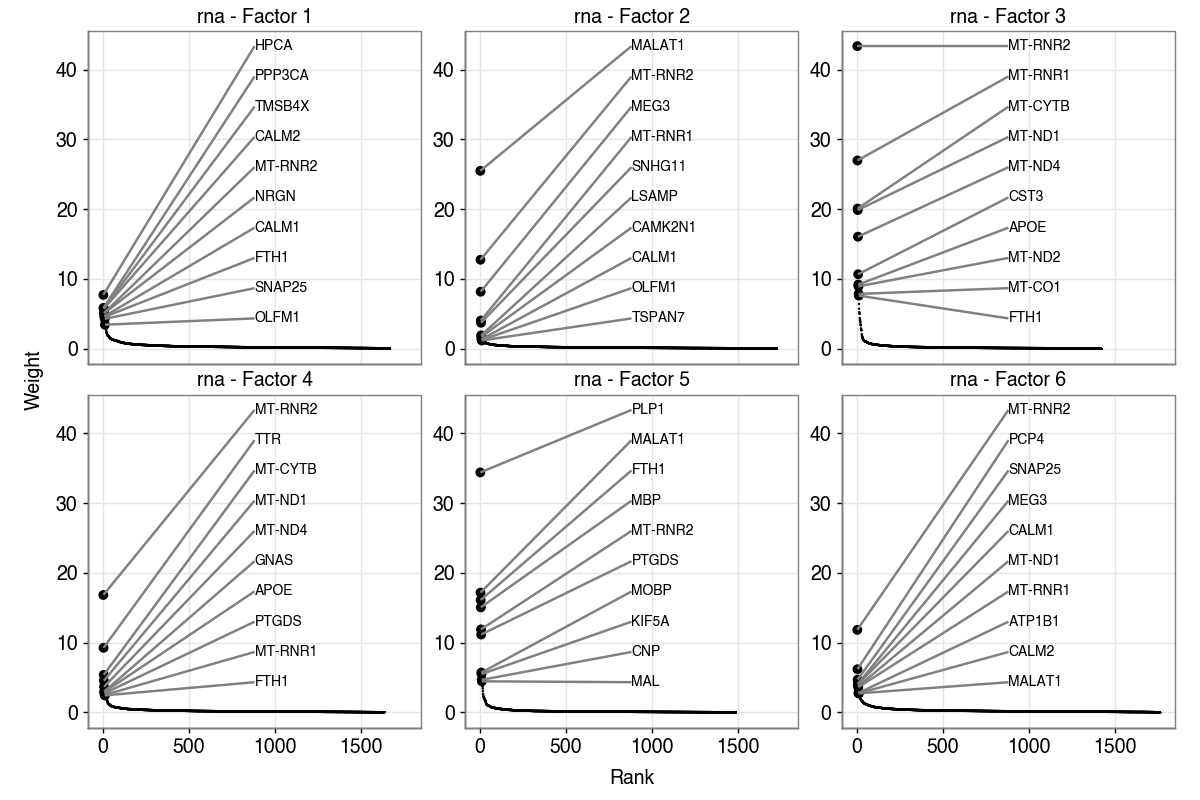

In [28]:
plot = weights(model, ncol=3, figsize=(6, 4))
fig = plot.draw()
fig.savefig(f"plots/prismo_weights.pdf")
plot.show()